In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot
from PIL import Image  
from PIL import Image, ImageOps
import numpy as np

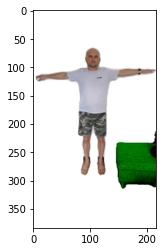

In [65]:
file_name="/content/drive/MyDrive/DataProyecto_medidas/Datos/front_processed/020.jpg"
photo = Image.open(file_name)
width, height = photo.size

if (height>1200):
  photo=photo.resize((int(width*0.3),int(height*0.3)))

imagenInicial= np.array(photo)

pyplot.imshow(imagenInicial)
pyplot.show()

In [66]:
arregloProceso=np.zeros((imagenInicial.shape[0], imagenInicial.shape[1], 3))

posy=0
posx=0
for i in imagenInicial:
  for j in i:
    if (j[0]<20 and j[1]>25 and j[2]<20) or (j[0]<5 and j[1]<30 and j[2]<5) or (j[0]>20 and j[1]<10 and j[2]>20):
      arregloProceso[posy][posx][0]=255
      arregloProceso[posy][posx][1]=255
      arregloProceso[posy][posx][2]=255
    else:
      arregloProceso[posy][posx][0]=imagenInicial[posy][posx][0]
      arregloProceso[posy][posx][1]=imagenInicial[posy][posx][1]
      arregloProceso[posy][posx][2]=imagenInicial[posy][posx][2]
      
    posx=posx+1

  posx=0
  posy=posy+1



In [67]:
#Procesamiento a la izquierda

#Hallar punto más a la izquierda

def HallarIzquierda(imgArray): 
     
  arregloGeneral=imgArray

  totalY=arregloGeneral.shape[0]
  totalX=arregloGeneral.shape[1]

  posDifZeroY=0
  posDifZeroX=totalX-1
  posx=0
  posy=0
  puntos=0

  for i in range(totalY):
    for j in range(totalX):
      posx=j
      posy=i
      if arregloGeneral[posy][posx][0]<245 and arregloGeneral[posy][posx][1]<245 and arregloGeneral[posy][posx][2]<245:
        if posDifZeroX > posx:
          for k in range(11):
            if arregloGeneral[posy][posx+k][0]>245 and arregloGeneral[posy][posx+k][1]>245 and arregloGeneral[posy][posx+k][2]>245:        
              break
          if k==10:
            posDifZeroX=posx
            posDifZeroY=posy
        break     

  return posDifZeroX

#Procesamiento a la derecha

#Hallar punto más a la derecha

def HallarDerecha(imgArray): 
  arregloGeneral=imgArray

  
  totalY=arregloGeneral.shape[0]
  totalX=arregloGeneral.shape[1]

  posDifZeroY=0
  posDifZeroX=0
  posx=0
  posy=0

  for i in range(totalY):
    for j in range(totalX):
      posx=totalX-j-1
      posy=i
      if arregloGeneral[posy][posx][0]<245 and arregloGeneral[posy][posx][1]<245 and arregloGeneral[posy][posx][2]<245:
        if posDifZeroX < posx:
          for k in  range(11):
            if arregloGeneral[posy][posx-k][0]>245 and arregloGeneral[posy][posx-k][1]>245 and arregloGeneral[posy][posx-k][2]>245:        
              break
          if k==10:
            posDifZeroX=posx
            posDifZeroY=posy
        break

  return posDifZeroX

#Procesamiento hacia arriba

#hallar punto más arriba

def HallarArriba(imgArray):

  arregloGeneral=imgArray

  totalY=arregloGeneral.shape[0]
  totalX=arregloGeneral.shape[1]

  posDifZeroY=0
  posDifZeroX=0
  posx=0
  posy=0

  for i in range(totalY):
    for j in range(totalX):
      posx=j
      posy=i
      if arregloGeneral[posy][posx][0]<245 and arregloGeneral[posy][posx][1]<245 and arregloGeneral[posy][posx][2]<245:
        for k in  range(11):
          if arregloGeneral[posy+k][posx][0]>245 and arregloGeneral[posy+k][posx][1]>245 and arregloGeneral[posy+k][posx][2]>245:        
            break
        if k==10:
          posDifZeroX=posx
          posDifZeroY=posy
        break
    if posDifZeroX!=0:
      break

  return posDifZeroY

#Procesamiento hacia abajo 

#Hallar punto más abajo

def HallarAbajo(imgArray):

  arregloGeneral=imgArray

  totalY=arregloGeneral.shape[0]
  totalX=arregloGeneral.shape[1]

  posDifZeroY=0
  posDifZeroX=0
  posx=0
  posy=0

  for i in range(totalY):
    for j in range(totalX):
      posx=j
      posy=totalY-i-1
      if arregloGeneral[posy][posx][0]<245 and arregloGeneral[posy][posx][1]<245 and arregloGeneral[posy][posx][2]<245:
        for k in  range(11):
          if arregloGeneral[posy-k][posx][0]>245 and arregloGeneral[posy-k][posx][1]>245 and arregloGeneral[posy-k][posx][2]>245:        
            break
        if k==10:
          posDifZeroX=posx
          posDifZeroY=posy
        break
    if posDifZeroX!=0:
      break

  return posDifZeroY


#Abrir imagen con Pillow y cropear

def CropearParte(imgMatriz):
  izquierda=HallarIzquierda(imgMatriz)
  print(izquierda)
  arriba=HallarArriba(imgMatriz)
  print(arriba)
  derecha=HallarDerecha(imgMatriz)
  print(derecha)
  abajo=HallarAbajo(imgMatriz)
  print(abajo)

  box=(izquierda,arriba,derecha,abajo)

  dif_horizontal=derecha-izquierda
  dif_vertical=abajo-arriba

  if (dif_horizontal > dif_vertical):
    img  = Image.new( mode = "RGB", size = ((dif_horizontal+50), (dif_horizontal+50)), color = (255, 255, 255) )
    imagenPill=Image.fromarray(imgMatriz)
    croppedImage=imagenPill.crop(box)
    img.paste(croppedImage,(25,int((dif_horizontal-dif_vertical)/2)))
  else:  
    img  = Image.new( mode = "RGB", size = ((dif_vertical+50), (dif_vertical+50)), color = (255, 255, 255) )
    imagenPill=Image.fromarray(imgMatriz)
    croppedImage=imagenPill.crop(box)
    img.paste(croppedImage,(int((dif_vertical-dif_horizontal)/2),25))


  return img

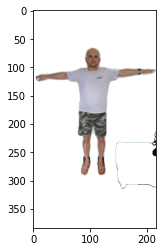

In [68]:
arregloProceso=np.uint8(arregloProceso)
pyplot.imshow(arregloProceso)
pyplot.show()

4
66
215
295


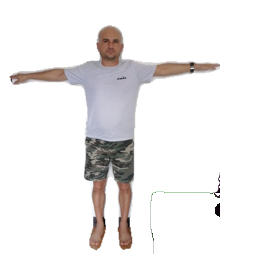

In [69]:
crop=CropearParte(arregloProceso)
crop